<a href="https://colab.research.google.com/github/hiydavid/tfdev_learning/blob/main/DLWP/ch7_working_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working With Keras: A Deep Dive

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


# Three Keras APIs

1. Sequential Model
2. Functional API
3. Model Subclassing

## Sequential Model

In [2]:
# simplest way to build is with keras sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [3]:
# same way but with the .add() method
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [4]:
# calling a model for the first time to build it
model.build(input_shape=(None, 3))

In [5]:
# now the model has weights initiated
model.weights[0][0]

<tf.Tensor: shape=(64,), dtype=float32, numpy=
array([-1.14505276e-01,  7.98799396e-02,  2.02267170e-01,  1.57865614e-01,
        2.03406811e-01, -6.77336752e-02,  1.34320945e-01,  2.41711020e-01,
        1.96042269e-01,  5.63030243e-02, -1.58359334e-01,  1.83129877e-01,
       -2.89218158e-01,  1.75718307e-01, -1.83873743e-01, -2.27354437e-01,
       -1.07300833e-01, -1.68474972e-01, -6.21695071e-02, -1.11545503e-01,
       -2.53369778e-01,  2.29124963e-01,  1.48761600e-01, -1.64328396e-01,
       -1.17961064e-01,  9.03856456e-02,  1.58728063e-02, -1.75725162e-01,
        1.50695771e-01, -5.13570905e-02,  1.33168697e-03, -1.78590387e-01,
       -2.91718513e-01, -2.65229851e-01,  2.88892746e-01, -2.95029312e-01,
       -1.86457723e-01,  4.51903939e-02, -9.45276320e-02, -1.95149705e-01,
        8.80017877e-02,  1.04943514e-02,  8.96314085e-02, -2.91691422e-01,
       -5.62150627e-02, -3.25432122e-02, -1.83611825e-01,  5.71240485e-02,
        1.71664268e-01, -1.07267648e-01, -9.38979983e

In [6]:
# the model also now has a summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [7]:
# rename model
model = tf.keras.Sequential(name="my_model")
model.add(tf.keras.layers.Dense(64, activation="relu", name="my_frist_layer"))
model.add(tf.keras.layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build(input_shape=(None, 3))
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_frist_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [8]:
# use Input class to declare input shape which automaticall builds the model
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(3, ))) # sample shape, not batch shape
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [9]:
# can then add new layers and recall summary
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


## Functional API

In [10]:
# functional version of the previous simple model
inputs = tf.keras.Input(shape=(3, ), name="my_input")
features = tf.keras.layers.Dense(64, activation="relu")(inputs)
outputs = tf.keras.layers.Dense(10, activation="softmax")(features)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [11]:
# input class now holds input information
inputs.shape, inputs.dtype

(TensorShape([None, 3]), tf.float32)

In [12]:
# feature class also has information
features.shape

TensorShape([None, 64])

In [13]:
# the model is instantiated can summary can be viewed
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [14]:
# a more complex model with multiple inputs and outputs
vocabulary_size = 10000
num_tags = 100
num_departments = 4

# model inputs
title = tf.keras.Input(shape=(vocabulary_size, ), name="title")
text_body = tf.keras.Input(shape=(vocabulary_size, ), name="text_body")
tags = tf.keras.Input(shape=(num_tags, ), name="tags")

# combine input features into a single tensor by concatenating
features = tf.keras.layers.Concatenate()([title, text_body, tags])

# apply an intermediate layer that recombines the features
features = tf.keras.layers.Dense(64, activation="relu")(features)

# define mode outputs
priority = tf.keras.layers.Dense(1, activation="sigmoid", name="priority")(features)
department = tf.keras.layers.Dense(
    num_departments, activation="softmax", name="department")(features)

# create the model
model = tf.keras.Model(
    inputs=([title, text_body, tags]),
    outputs=([priority, department])
)

In [15]:
# check model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

In [16]:
# train this model by provoding lists of input and target arrays
num_samples = 1280

# dummy inputs
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# dummy outputs
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

# compile this model
model.compile(
    optimizer="rmsprop",
    loss=["mean_squared_error", "categorical_crossentropy"],
    metrics=[["mean_absolute_error"], ["accuracy"]]
)

# fit model
model.fit(
    x=[title_data, text_body_data, tags_data],
    y=[priority_data, department_data],
    epochs=1
)

# evaluate the model
model.evaluate(
    x=[title_data, text_body_data, tags_data],
    y=[priority_data, department_data]
)

# make predictions for each output
priority_preds, department_preds = model.predict(
    x=[title_data, text_body_data, tags_data]
)

40/40 [==============================] - 1s 9ms/step - loss: 31.5179 - priority_loss: 0.3290 - department_loss: 31.1889 - priority_mean_absolute_error: 0.4940 - department_accuracy: 0.2609


In [17]:
# the compile and fit steps can use dicts without relying on order
model.compile(
    optimizer="rmsprop",
    loss={"priority": "mean_squared_error", 
          "department": "categorical_crossentropy"
    },
    metrics={"priority": ["mean_absolute_error"],
             "department": ["accuracy"]
    }
)

model.fit(
    x={"title": title_data,
       "text_body": text_body_data,
       "tags": tags_data
    },
    y={"priority": priority_data, 
       "department": department_data
    },
)

model.evaluate(
    x={"title": title_data,
       "text_body": text_body_data,
       "tags": tags_data
    },
    y={"priority": priority_data, 
       "department": department_data
    }
)

priority_preds, department_preds = model.predict(
    x={"title": title_data, 
       "text_body": text_body_data, 
       "tags": tags_data
    }
)

40/40 [==============================] - 1s 11ms/step - loss: 30.7646 - priority_loss: 0.3396 - department_loss: 30.4250 - priority_mean_absolute_error: 0.5047 - department_accuracy: 0.0648


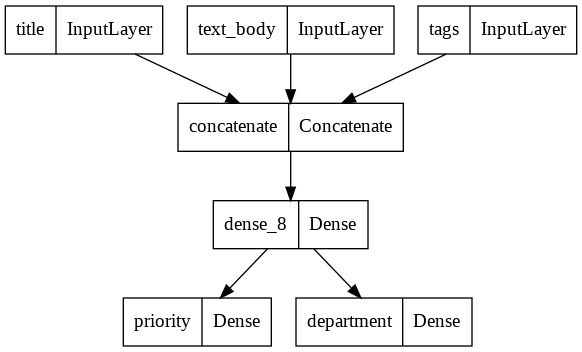

In [19]:
# view model graph (topology)
tf.keras.utils.plot_model(model, "ticket_classifier.png")

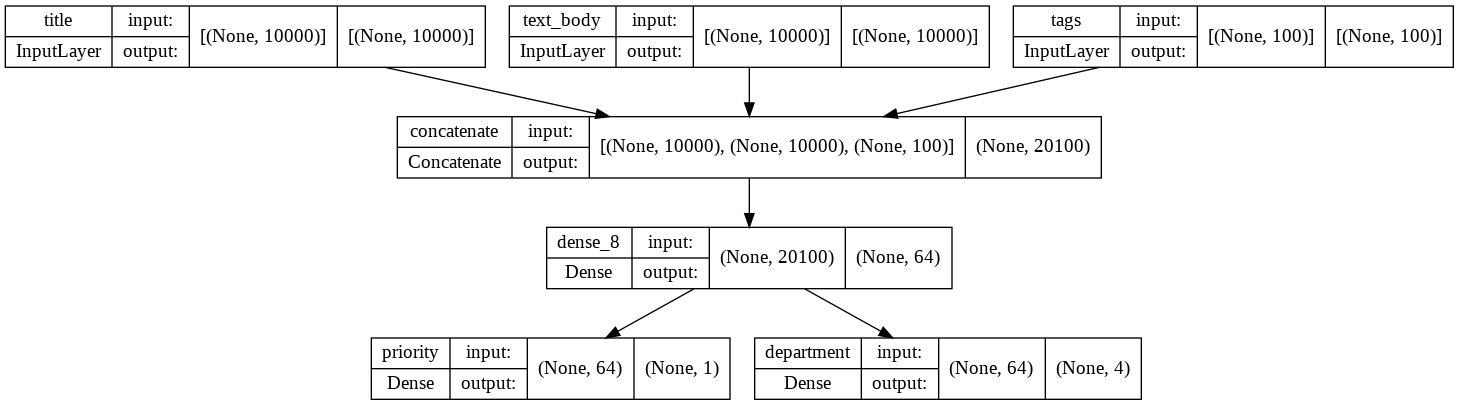

In [20]:
# view model graph (topology) with shapes
tf.keras.utils.plot_model(model, "ticket_classifier.png", show_shapes=True)

In [24]:
# check layers
model.layers

In [29]:
# call input/output of specific layers
print(model.layers[3].input)
print(model.layers[3].output)

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>, <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>, <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]
KerasTensor(type_spec=TensorSpec(shape=(None, 20100), dtype=tf.float32, name=None), name='concatenate/concat:0', description="created by layer 'concatenate'")


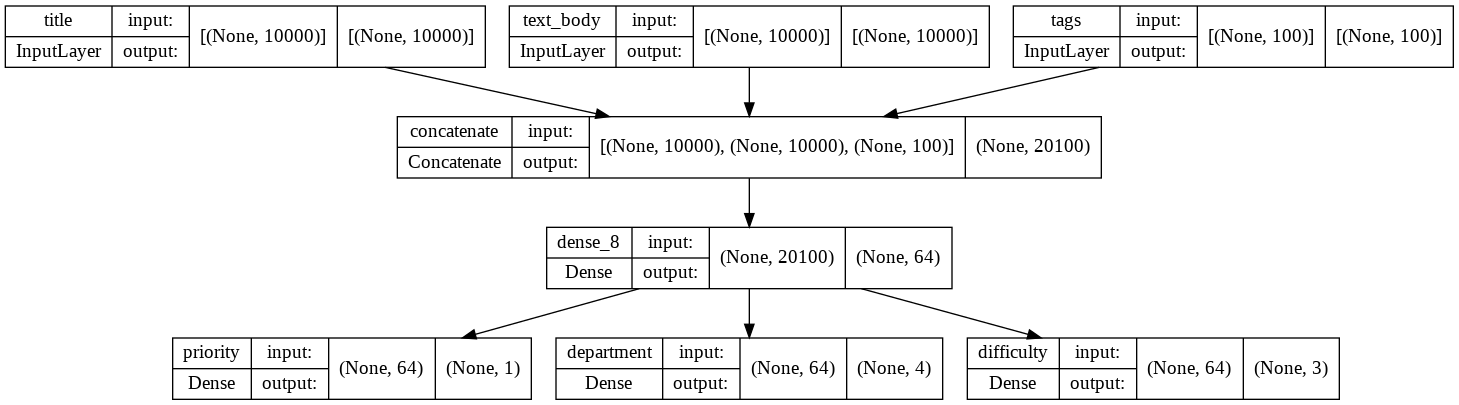

In [30]:
# create a new model by reusing intermediate layer outputs
features = model.layers[4].output
difficulty = tf.keras.layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = tf.keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty]
)

tf.keras.utils.plot_model(
    new_model, "updated_ticket_classifier.png", show_shapes=True
)

In [31]:
# look at layers of new model
new_model.layers

## Model Subclassing